In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [3]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [4]:
fnames = glob.glob('/data2/GBT/*/OnOff/*/*A*.fits')
fnames.sort()
print len(fnames)

105


In [5]:
f = fits.open(fnames[10])
hdu = f[1]
data = hdu.data['DATA']

In [6]:
N = 2**14
df = hdu.data['CDELT1'][0]
center_freq = hdu.data['CRVAL1'][0]
centerbin = hdu.data['CRPIX1'][0]
index = np.arange(N)
if_freqs = freqstest = index * (-df)
freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
mask = np.ones(N, dtype=bool)
mask[(index % 512) == 511] = False
mask[if_freqs < 150.e6] = False
mask[if_freqs > 1400.e6] = False
#mask[(freqs >= 4.225e9) & (freqs <= 4.375e9)] = False

In [7]:
xxoff = data[::8, ::-1]
xxoff = xxoff[200:, :]
xxoff[:, ~mask] = np.nan

In [8]:
ratio = np.zeros(N)
ratio[mask] = np.nanstd(xxoff[:, mask], 0) / np.nanmean(xxoff[:, mask], 0)
ratio[~mask] = np.nan
ratio_mad = 5. / 0.67449 * mad(ratio[mask])

(-0.02, 0.02)

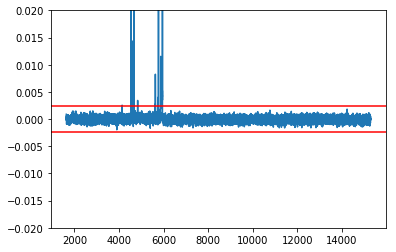

In [9]:
plot(ratio - np.nanmean(ratio))
axhline(ratio_mad, color='r')
axhline(-ratio_mad, color='r')
ylim(-0.02, 0.02)

In [10]:
bad = np.zeros_like(mask)
bad[mask] = np.abs(ratio[mask] - np.nanmean(ratio[mask])) > ratio_mad
mask[bad] = False
xxoff[:, ~mask] = np.nan

In [11]:
msdata = np.zeros_like(xxoff)
msdata[:, mask] = xxoff[:, mask] - np.nanmean(xxoff[:, mask], 0)
msdata[:, ~mask] = np.nan
msstd = np.nanstd(msdata[:, mask], 1)

In [12]:
msdata_mad = 5. / 0.67449 * mad(msstd)

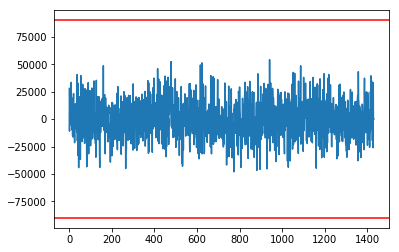

In [13]:
plot(msstd - np.nanmean(msstd))
axhline(msdata_mad, color='r')
axhline(-msdata_mad, color='r')

In [14]:
xxoff.shape[0]

1431

In [15]:
tbad = np.zeros(xxoff.shape[0])
tbad = np.abs(msstd - np.nanmean(msstd)) > msdata_mad
xxoff[tbad, :] = np.nan

In [16]:
speck = np.zeros(xxoff.shape[1])
speck[mask] = np.nanmean((msdata[:, mask][~tbad, :]**4), 0) / np.nanmean((msdata[:, mask][~tbad, :]**2), 0)**2
speck[~mask] = np.nan
speck_mad = 5. / 0.67449 * mad(speck[mask])

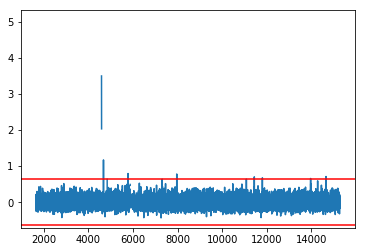

In [17]:
plot(speck - np.nanmean(speck))
axhline(speck_mad, color='r')
axhline(-speck_mad, color='r')

In [18]:
bad = np.zeros_like(mask)
bad[mask] = np.abs(speck[mask] - np.nanmean(speck[mask])) > speck_mad
mask[bad] = False
xxoff[:, ~mask] = np.nan

In [19]:
speck = np.zeros(xxoff.shape[1])
speck[mask] = np.nanmean((msdata[:, mask][~tbad, :]**4), 0) / np.nanmean((msdata[:, mask][~tbad, :]**2), 0)**2
speck[~mask] = np.nan
speck_mad = 5. / 0.67449 * mad(speck[mask])

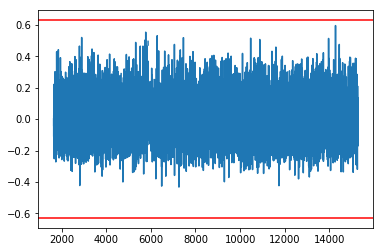

In [20]:
plot(speck - np.nanmean(speck))
axhline(speck_mad, color='r')
axhline(-speck_mad, color='r')